In [1]:
# Import Torch
import torch
from torch import nn

# Import Torch Vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader


# Visulalization
import matplotlib.pyplot as plt

# Check the torch, vision version
print(torch.__version__)
print(torchvision.__version__)

2.1.0
0.16.0


In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("dataset/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

dataset/pizza_steak_sushi directory exists.


In [3]:
import os
# Function for viewing the items in a directory
def walk_through_dir(dir_path):
    for dirpath, dirname, filename in os.walk(dir_path):
        print(f"These are {len(dirname)}, directories {len(filename)} images in {dirpath}")

In [4]:
walk_through_dir(image_path)

These are 2, directories 0 images in dataset/pizza_steak_sushi
These are 3, directories 0 images in dataset/pizza_steak_sushi/test
These are 0, directories 19 images in dataset/pizza_steak_sushi/test/steak
These are 0, directories 31 images in dataset/pizza_steak_sushi/test/sushi
These are 0, directories 25 images in dataset/pizza_steak_sushi/test/pizza
These are 3, directories 0 images in dataset/pizza_steak_sushi/train
These are 0, directories 75 images in dataset/pizza_steak_sushi/train/steak
These are 0, directories 72 images in dataset/pizza_steak_sushi/train/sushi
These are 0, directories 78 images in dataset/pizza_steak_sushi/train/pizza


In [5]:
# Train and test directories

train_dir = image_path/ "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('dataset/pizza_steak_sushi/train'),
 PosixPath('dataset/pizza_steak_sushi/test'))

Random image path: dataset/pizza_steak_sushi/train/pizza/2228322.jpg
Image class: pizza
Image height: 512
Image width: 512


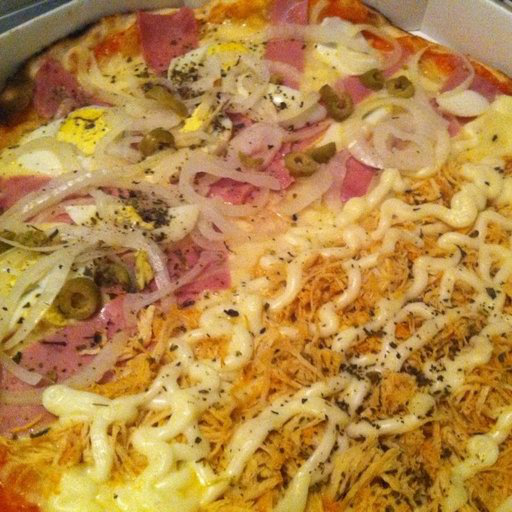

In [6]:
import random
from PIL import Image

# Set seed
# random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [7]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

In [8]:
data_transform(img)

tensor([[[0.5255, 0.5765, 0.7216,  ..., 0.2627, 0.2627, 0.2824],
         [0.6980, 0.7333, 0.7137,  ..., 0.2980, 0.2980, 0.2902],
         [0.7255, 0.7098, 0.7059,  ..., 0.3176, 0.2784, 0.3020],
         ...,
         [0.7020, 0.6863, 0.6078,  ..., 0.7373, 0.7216, 0.6980],
         [0.7451, 0.7059, 0.6588,  ..., 0.7255, 0.7176, 0.6941],
         [0.7647, 0.7333, 0.6549,  ..., 0.7098, 0.7059, 0.6667]],

        [[0.4941, 0.5608, 0.7098,  ..., 0.2784, 0.2706, 0.2941],
         [0.6706, 0.7020, 0.6627,  ..., 0.3176, 0.3216, 0.3098],
         [0.6745, 0.6549, 0.6392,  ..., 0.3255, 0.3137, 0.3373],
         ...,
         [0.4627, 0.4549, 0.4000,  ..., 0.3882, 0.3255, 0.2627],
         [0.5843, 0.5098, 0.4510,  ..., 0.3176, 0.2784, 0.2196],
         [0.6667, 0.5922, 0.4588,  ..., 0.2549, 0.2353, 0.1765]],

        [[0.4353, 0.5059, 0.6314,  ..., 0.2235, 0.2235, 0.2627],
         [0.6000, 0.6353, 0.5804,  ..., 0.3137, 0.3020, 0.2784],
         [0.5961, 0.5529, 0.5412,  ..., 0.3255, 0.3137, 0.

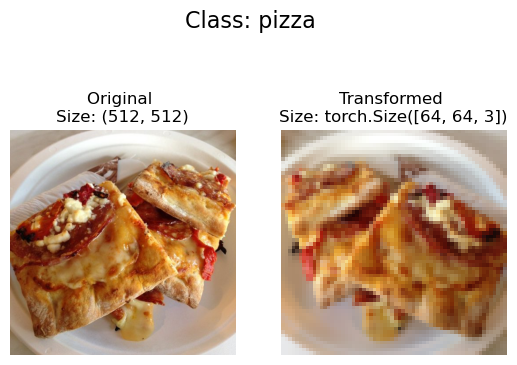

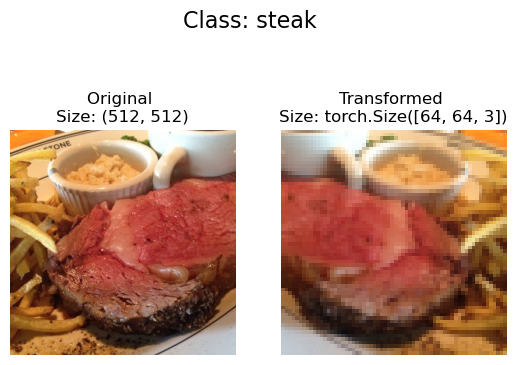

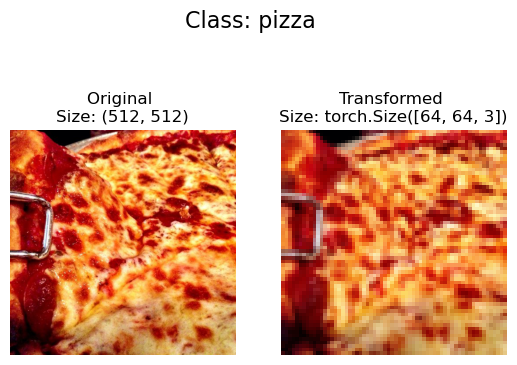

In [9]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    # random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [10]:
# Use ImageFolder to create dataset(s)

train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: dataset/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: dataset/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [11]:
# Use ImageFolder to create dataset(s)
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [12]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)